In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
np.random.seed(50)
H =np.random.randint(140,200,200)
W =np.random.randint(40,120,200)
BMI =W/((H/100)**2)
BMI = pd.DataFrame({"Hieght":H,"Wieght":W,"BMI":BMI})
BMI

,Hieght,Wieght,BMI
0,188,104,29.425079
1,172,118,39.886425
2,151,92,40.349107
3,185,66,19.284149
4,173,85,28.400548
...,...,...,...
195,154,87,36.684095
196,196,99,25.770512
197,142,70,34.715334
198,180,103,31.790123


In [3]:
def category(bmi):
    bmi = float(bmi)
    if bmi <= 19 and bmi > 1:
        return "slim"
    elif bmi <= 25 and bmi > 19:
        return "normal"
    else:
        return "over weight"
BMI["Category"] = BMI["BMI"].apply(category)

print(BMI)

     Hieght  Wieght        BMI     Category
0       188     104  29.425079  over weight
1       172     118  39.886425  over weight
2       151      92  40.349107  over weight
3       185      66  19.284149       normal
4       173      85  28.400548  over weight
..      ...     ...        ...          ...
195     154      87  36.684095  over weight
196     196      99  25.770512  over weight
197     142      70  34.715334  over weight
198     180     103  31.790123  over weight
199     162      98  37.341869  over weight

[200 rows x 4 columns]


In [4]:
L_C=LabelEncoder()
BMI["Category"] = L_C.fit_transform(BMI["Category"])

In [5]:
X =BMI[["Hieght","Wieght"]]
Y =BMI["Category"]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [7]:
print(X_train, X_test, Y_train, Y_test)

     Hieght  Wieght
114     190      64
187     166      86
76      185     118
122     198      91
142     141      40
..      ...     ...
132     157      50
33      140     102
109     184      79
139     199      94
176     149      95

[140 rows x 2 columns]      Hieght  Wieght
112     178      67
165     162      48
12      145      59
73      198     116
144     148      40
20      175      67
199     162      98
8       177     118
39      170     112
88      172     103
81      141      90
197     142      70
69      147      43
160     170     109
25      146      91
99      193      54
151     196      54
23      166     117
138     167     114
159     151      67
89      159     119
82      149      83
24      166      61
174     197      56
137     167      65
83      169      72
107     180      45
34      199      52
97      176      94
167     177      83
123     192      77
157     190      90
75      140      61
152     155      44
117     168      49
149     143     

In [8]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

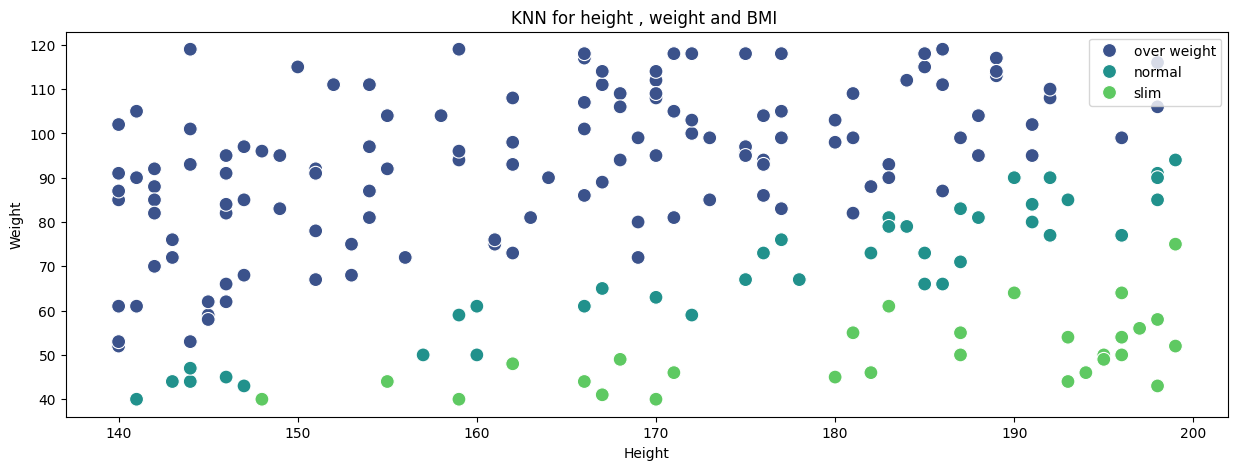

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=X,x=H,y=W,hue=L_C.inverse_transform(Y),palette="viridis",s=100)
plt.title("KNN for height , weight and BMI ")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

Enter your Height in cm:  56
Enter your Weight in kg:  24


Distance = [[86.49277426 88.54377448 88.86506625 90.24411338]]


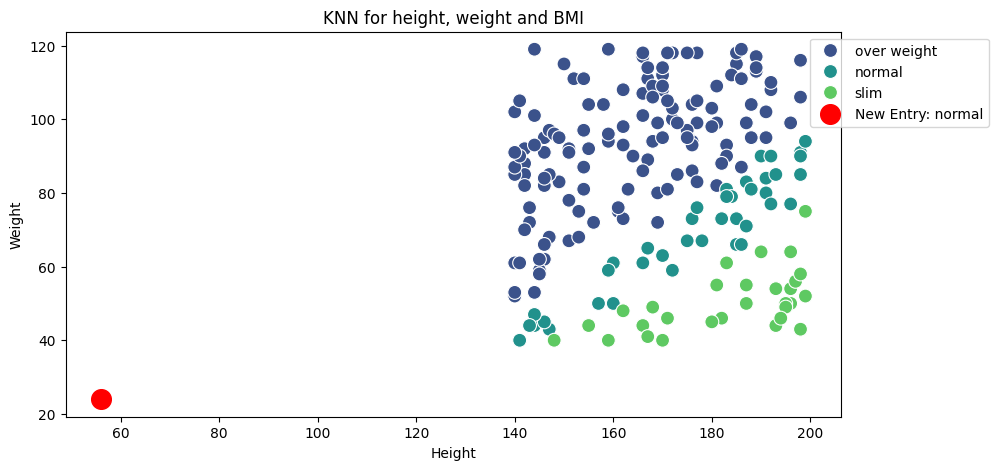

Height = 56.0 | Weight = 24.0 | Predicted Category = normal 


In [11]:
def predictBMI(data,model,L_C):
    p= model.predict(data)
    P_C = L_C.inverse_transform(p)[0]
    return P_C
user_H =float(input("Enter your Height in cm: "))
user_W =float(input("Enter your Weight in kg: "))

input_data = np.array([[user_H, user_W]])
predicted_Category = predictBMI(input_data,model,L_C)

D,I = model.kneighbors(input_data,n_neighbors = 4)

print(f"Distance = {D}")

plt.figure(figsize = (10,5))
# Training data plot
sns.scatterplot(data=X,x=H,y=W,hue=L_C.inverse_transform(Y),palette = "viridis", s =100)

# Input data plot
plt.scatter(input_data[0,0], input_data[0,1],color = 'red',s =200, label = f'New Entry: {predicted_Category}')
plt.title("KNN for height, weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc = "upper right", bbox_to_anchor = (1,0.2,0.2,0.8))
plt.show()
print(f"Height = {user_H} | Weight = {user_W} | Predicted Category = {predicted_Category} ")
